In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_oders_dataset.csv")
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount_value,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [3]:
# Now convert order date from object data type to datetime
df["order_date"] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")

In [4]:
# Sub-Category wise total sales
sub_category = df.groupby("sub_category")['sale_price'].sum().sort_values(ascending=False).index
total = df.groupby("sub_category")['sale_price'].sum().sort_values(ascending=False).values

In [5]:
# to enhance dpi and size
plt.rcParams['figure.dpi'] = 300

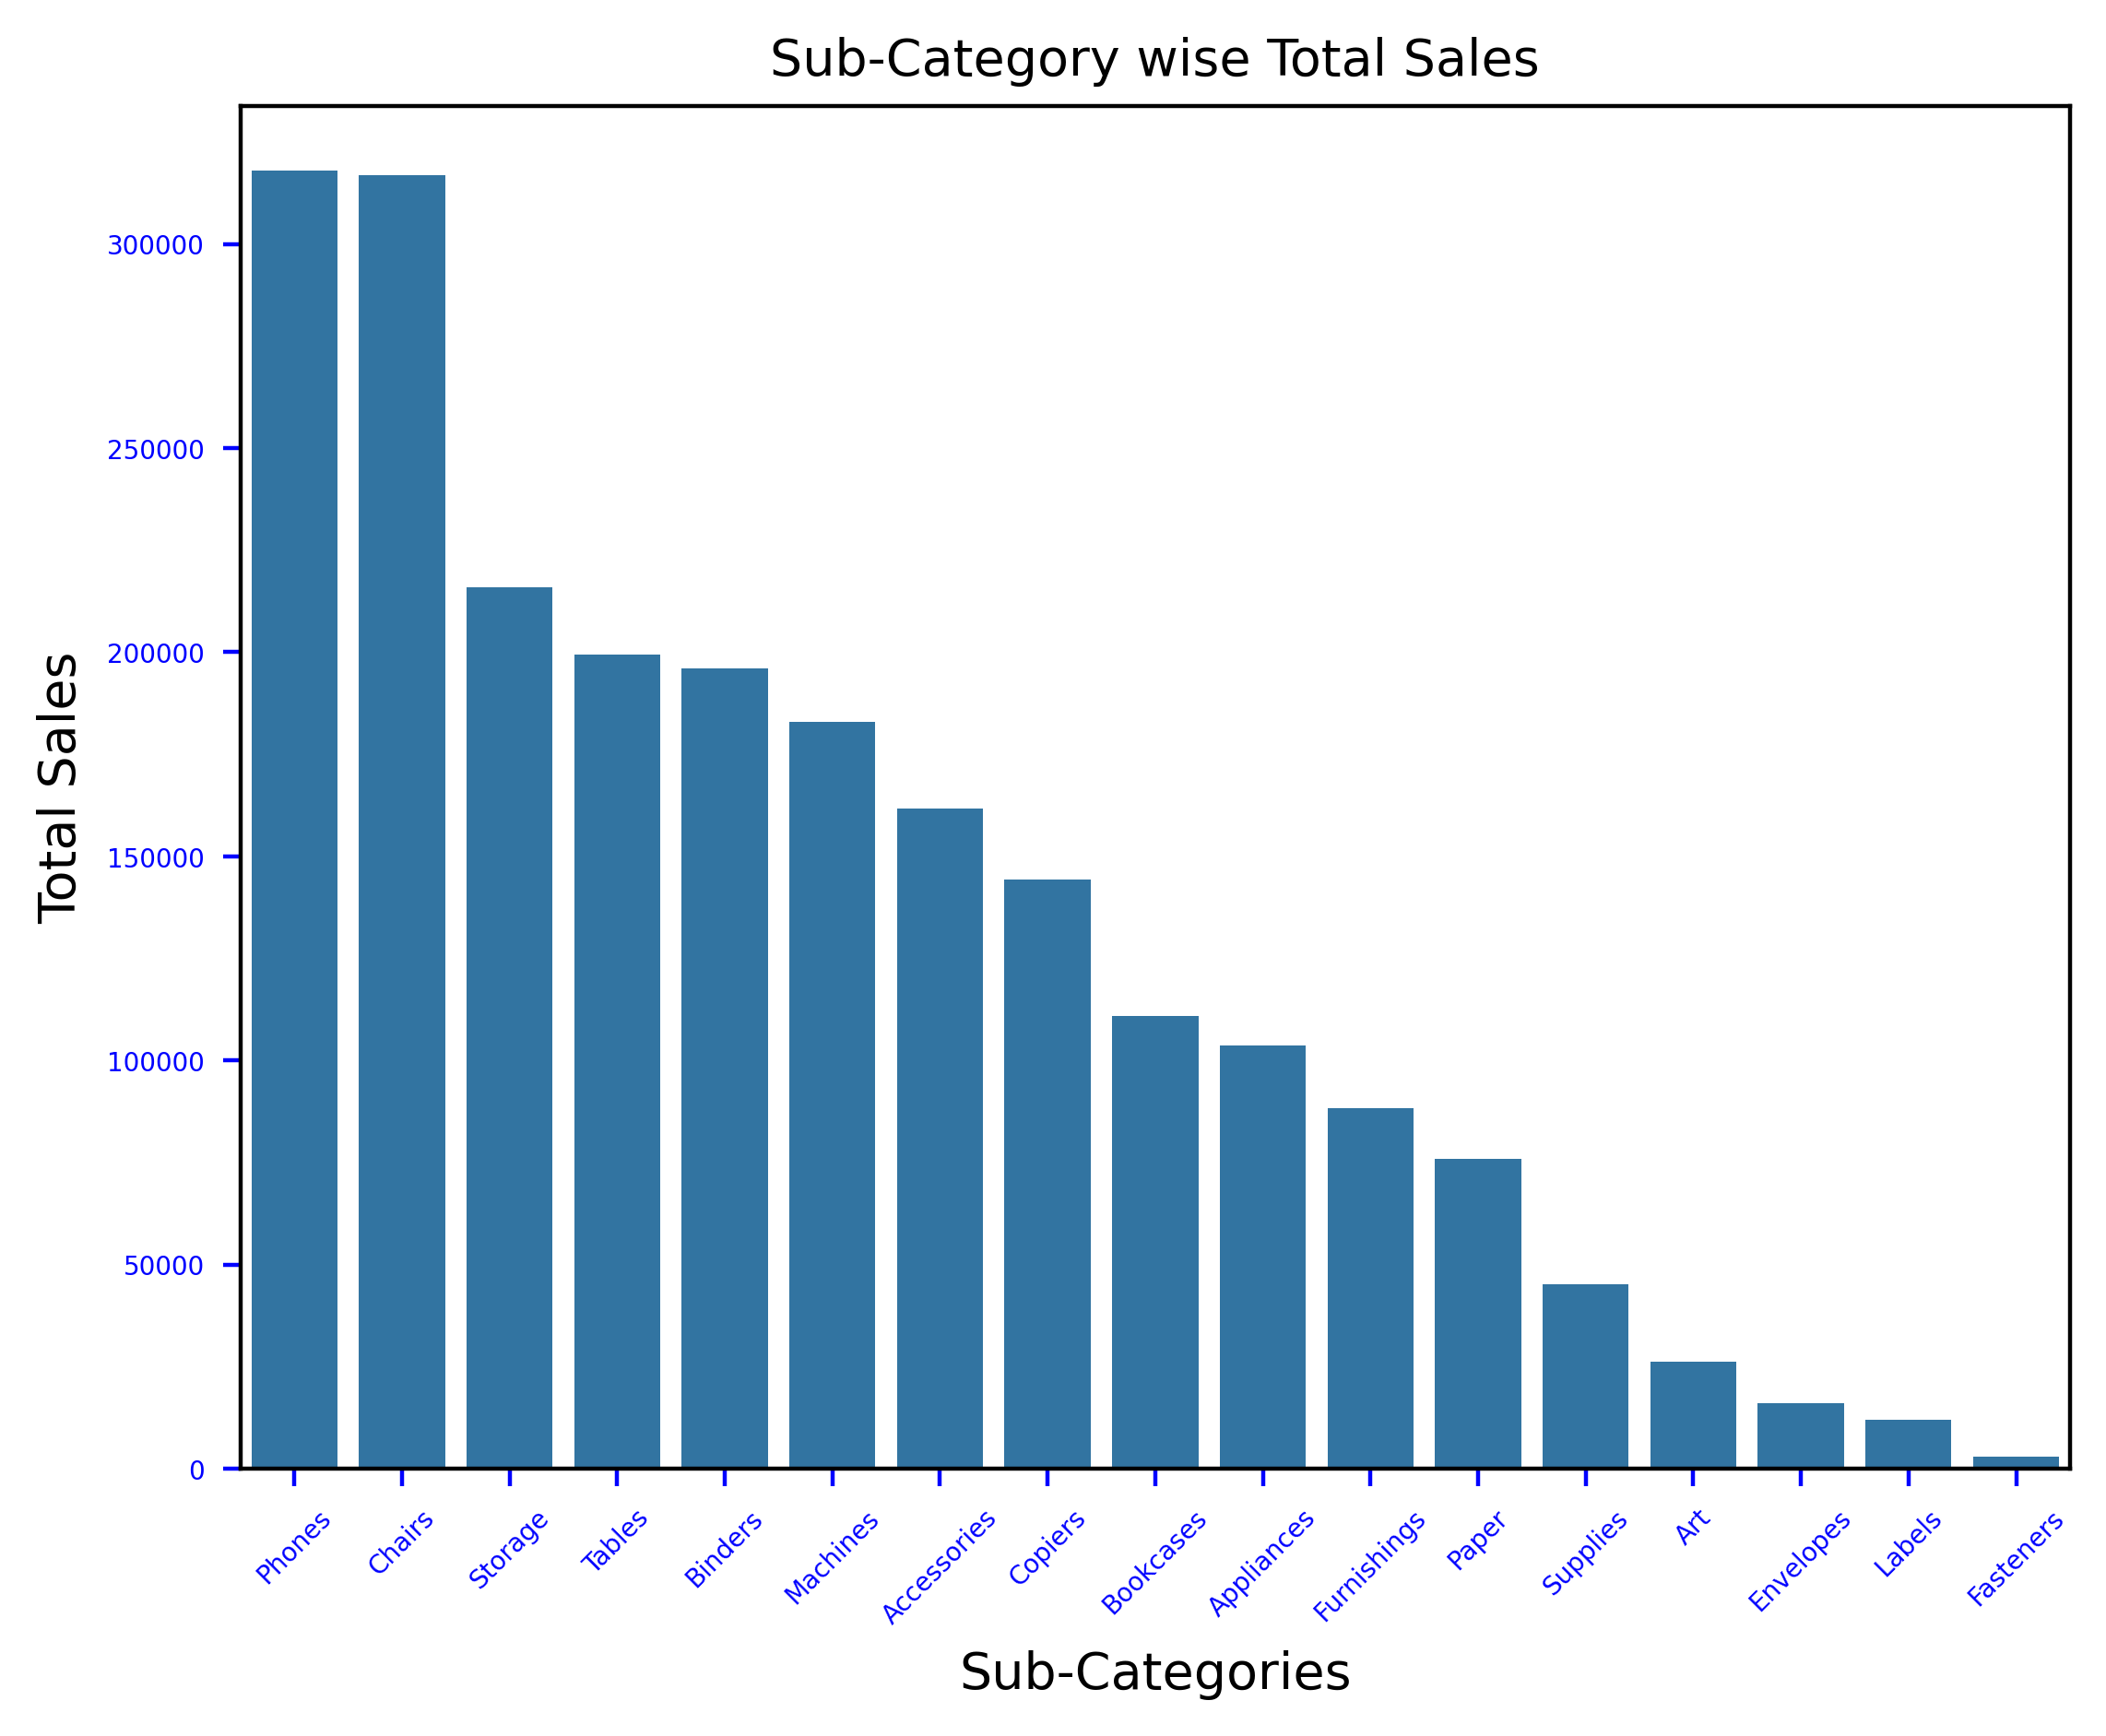

In [6]:

sns.barplot(x=sub_category,y=total)
plt.xticks(rotation=45)
plt.tick_params(labelsize=5, colors='b')
plt.title("Sub-Category wise Total Sales",size=10)
plt.xlabel("Sub-Categories",size=10)
plt.ylabel("Total Sales",size=10)
plt.savefig(r"D:\Data Science\Project\web\static\img\img-1")
plt.show()

In [7]:
# Which Categories perform what percentage of sale price out of total sale price
category = df.groupby('category')['sale_price'].sum().index
total = df.groupby('category')['sale_price'].sum().values

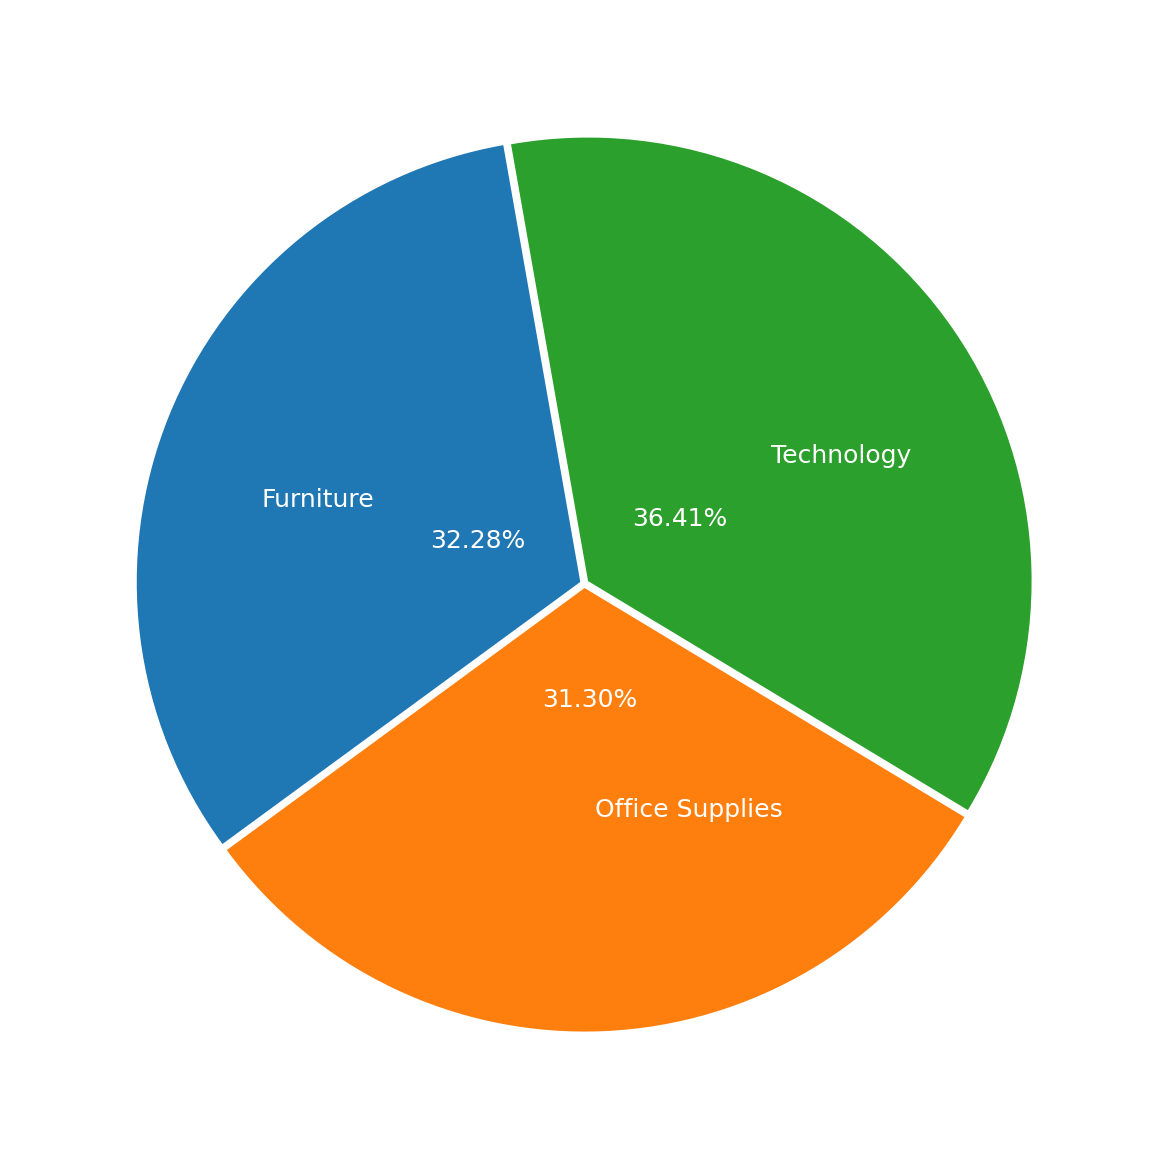

In [8]:
plt.figure(dpi=300,frameon=False)
plt.pie(total, labels=category,explode=[0.01,0.01,0.01],
        labeldistance=0.5,autopct="%.2f%%",pctdistance=0.25,startangle=100,
        textprops={'fontsize': 6,'color':'w'})
plt.savefig(r"D:\Data Science\Project\web\static\img\img-2")
plt.show()

In [9]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount_value,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2,2023,2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4,2023,3
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8,2022,8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9,2022,11


In [10]:
d = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
a = df.loc[:,["month","sale_price","year"]].sort_values("month")
a['month'].replace(d,inplace=True)
a

C:\Users\Sagar\AppData\Local\Temp\ipykernel_10104\627152685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  a['month'].replace(d,inplace=True)


,month,sale_price,year
4996,Jan,48.5,2023
1223,Jan,78.4,2023
5778,Jan,29.4,2023
5798,Jan,76.8,2023
5802,Jan,19.0,2022
...,...,...,...
7455,Dec,1019.2,2022
4876,Dec,58.8,2022
4872,Dec,19.0,2022
8757,Dec,48.0,2022


In [11]:
plt.rcParams['figure.dpi'] = 300

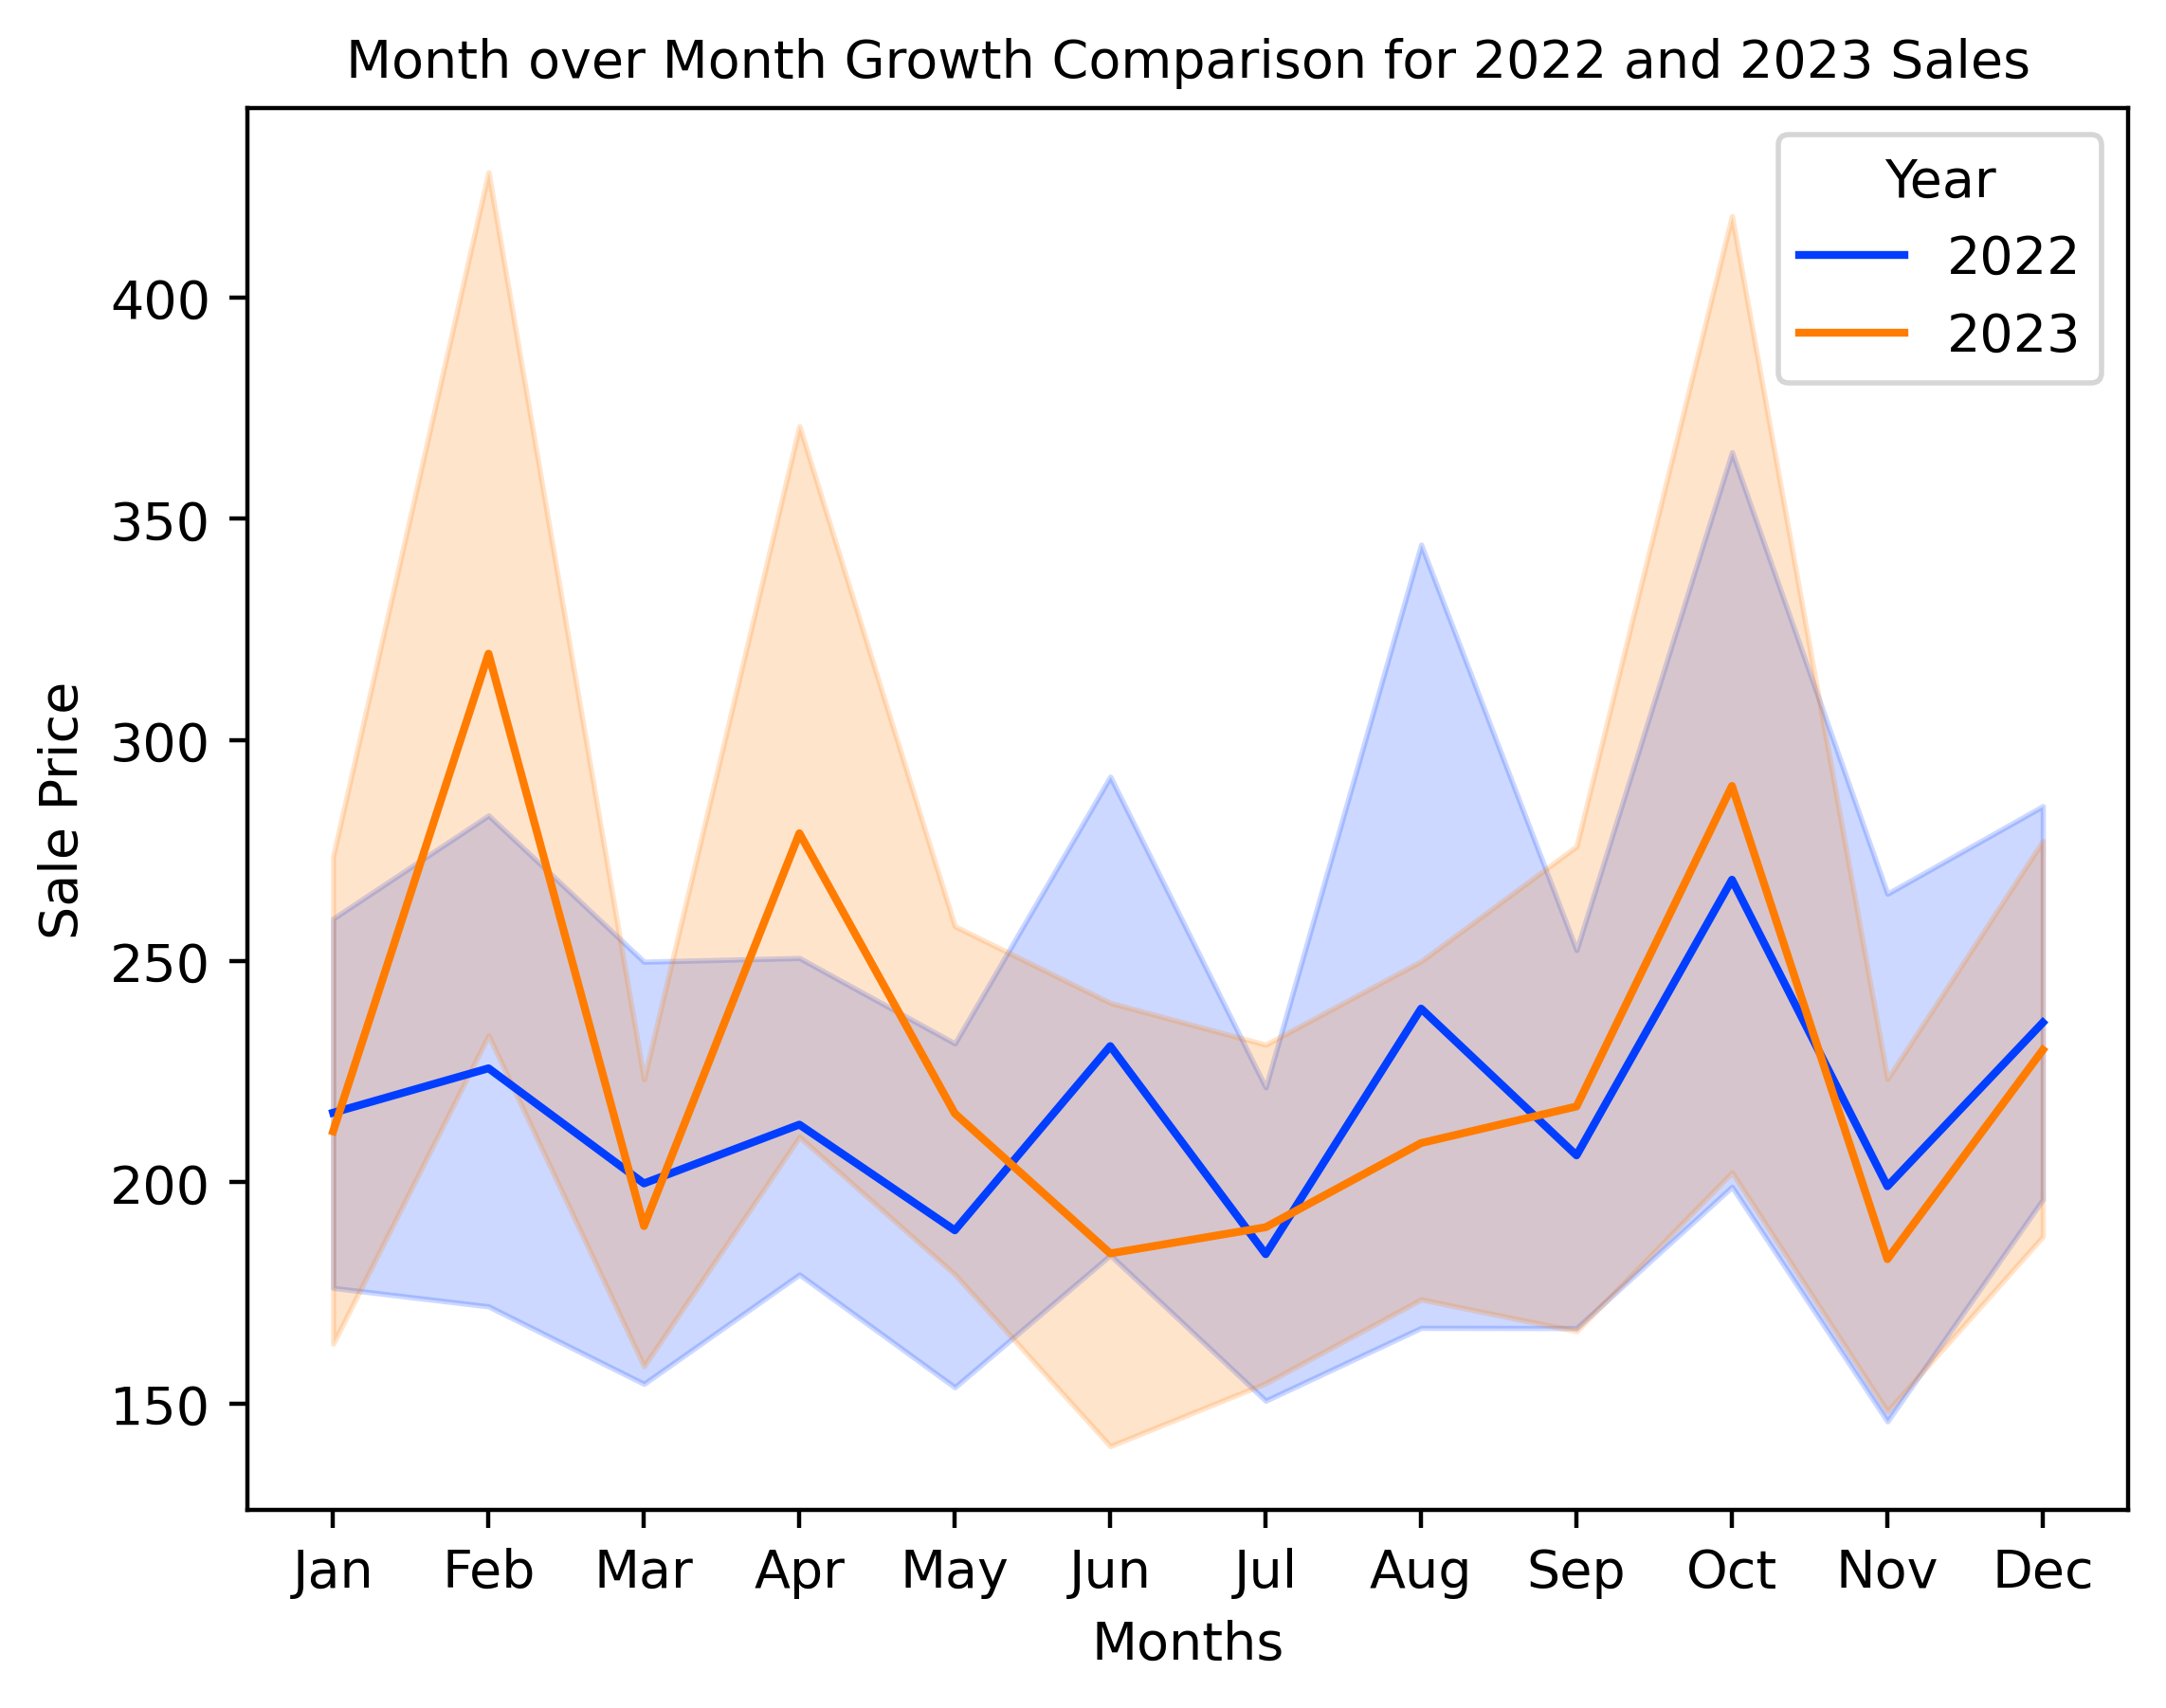

In [12]:
# Month over Month Growth Comparison for 2022 and 2023 Sales
sns.lineplot(x="month",y='sale_price',hue='year',data=a,palette='bright')
plt.legend(title='Year')
plt.title("Month over Month Growth Comparison for 2022 and 2023 Sales",size=10)
plt.xlabel("Months",size=10)
plt.ylabel("Sale Price",size=10)
plt.savefig(r"D:\Data Science\Project\web\static\img\img-3")
plt.show()

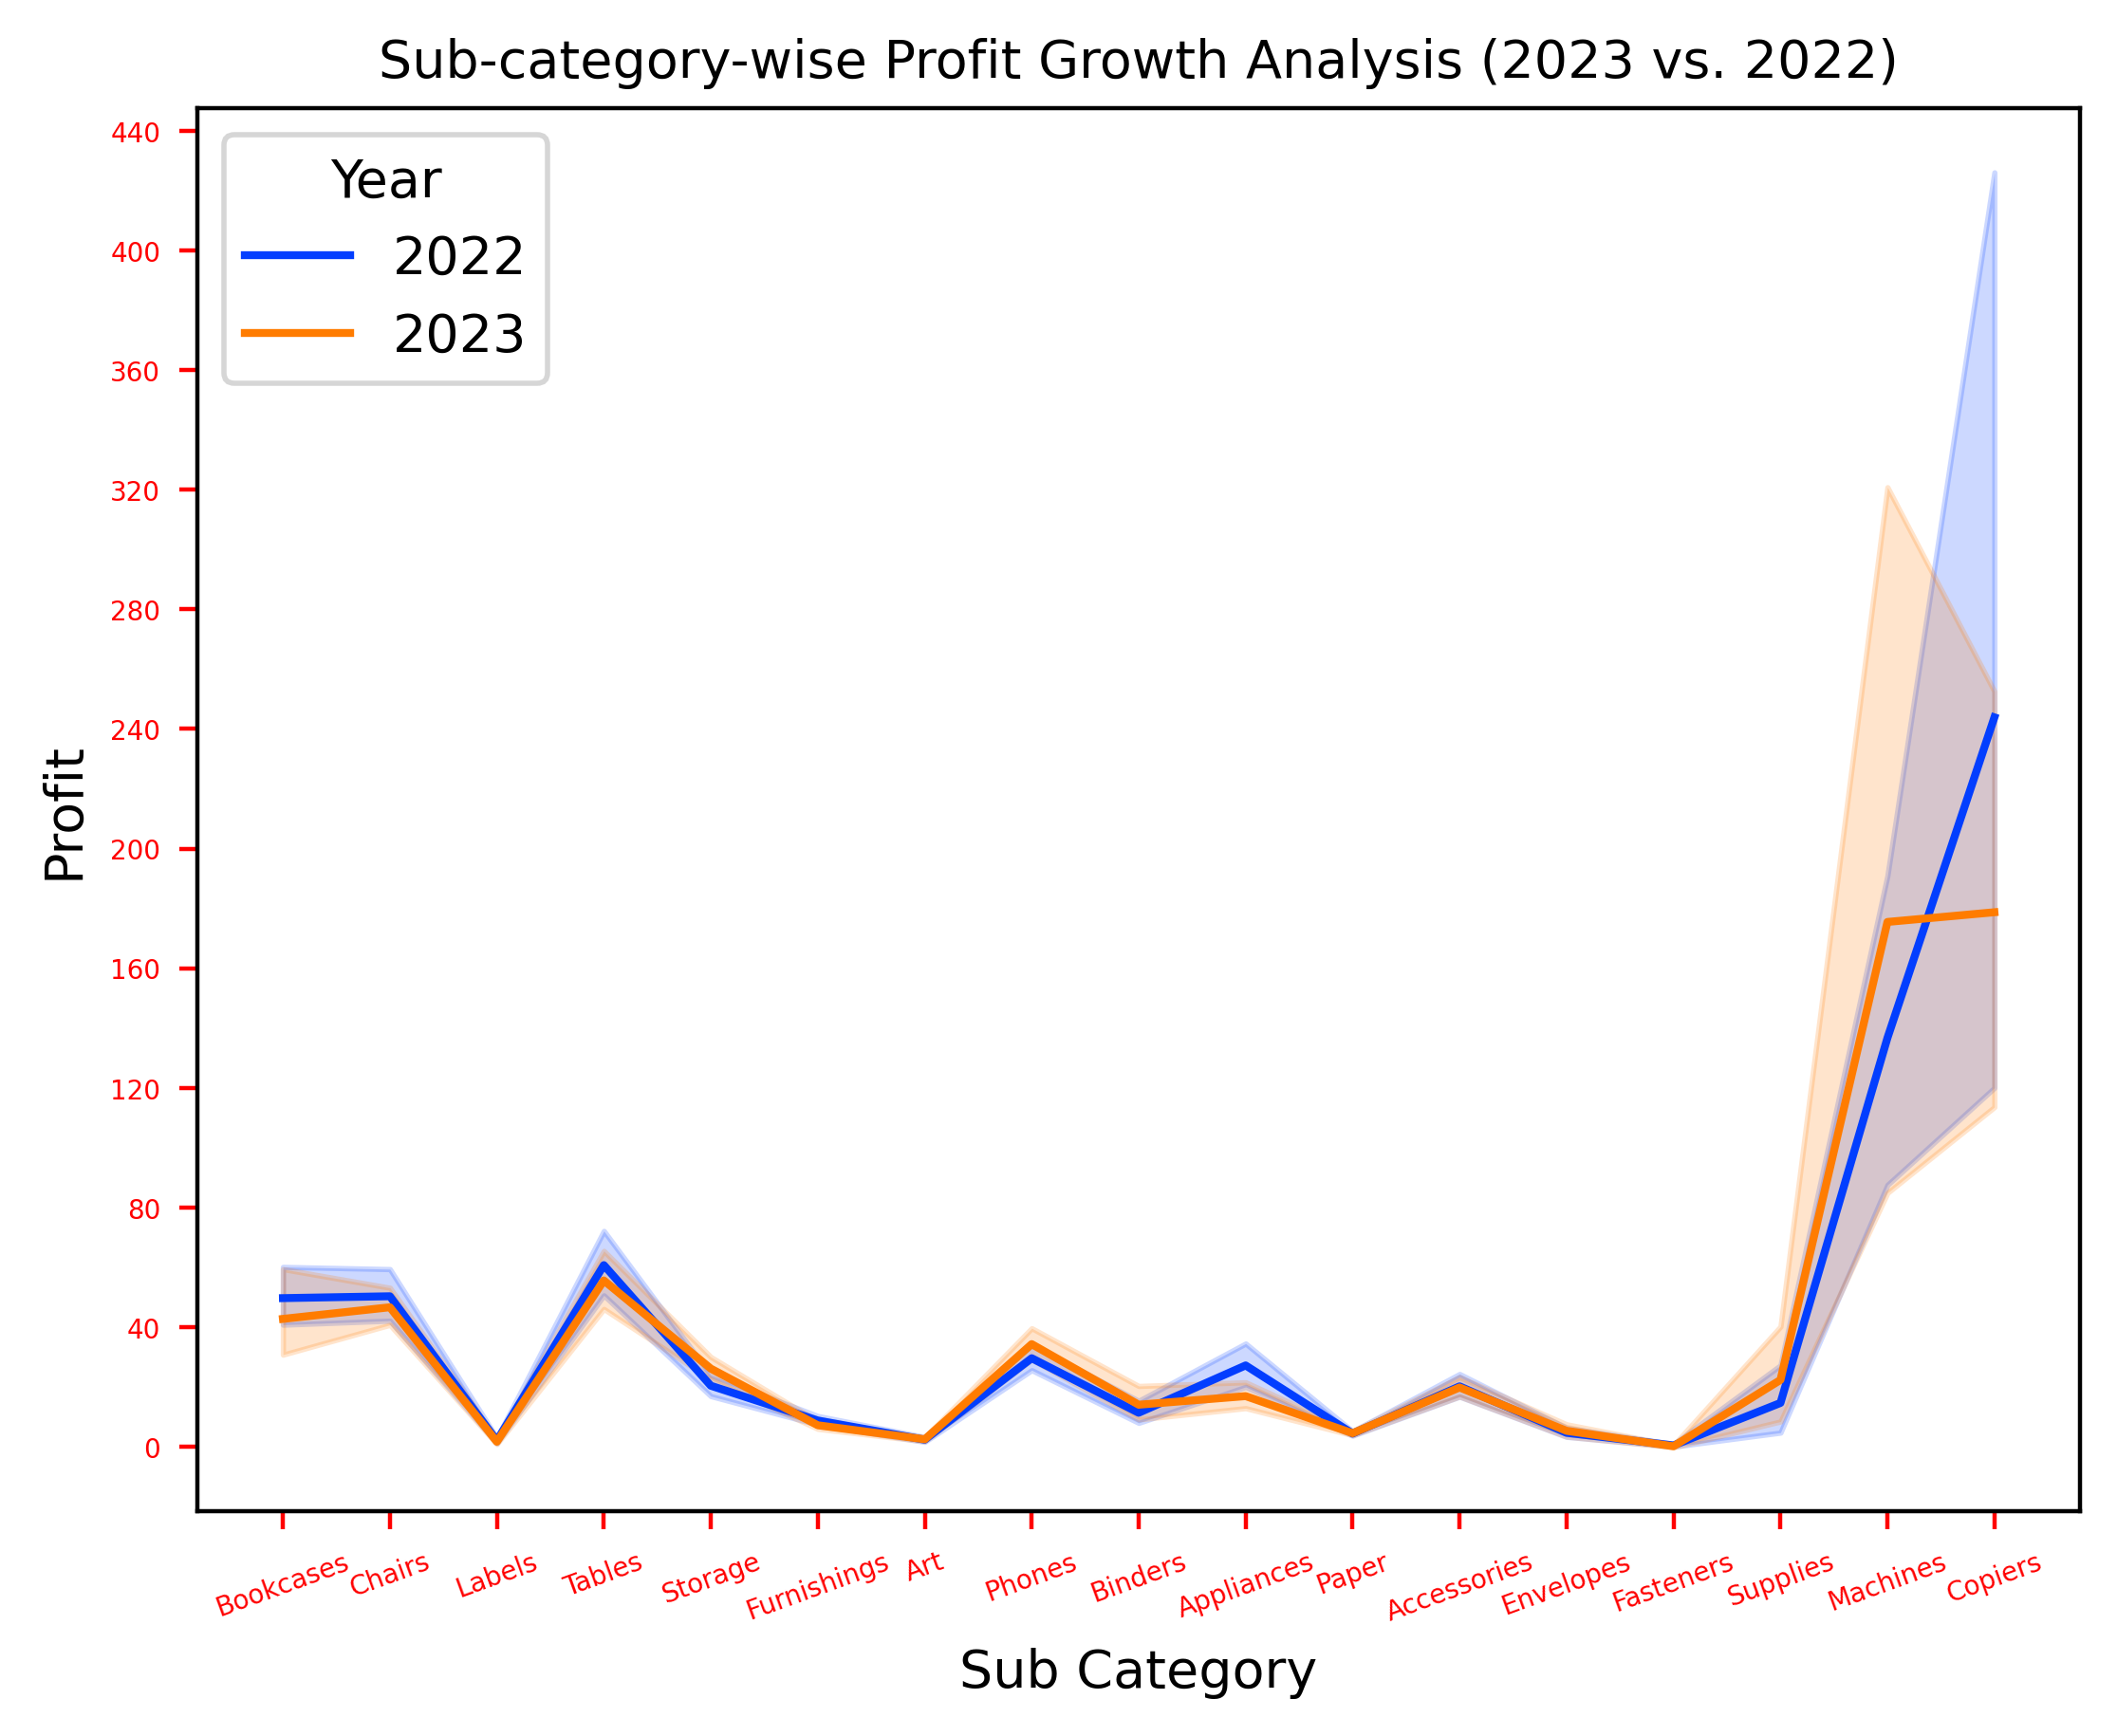

In [13]:
# Sub-category wise growth by profit in 2023 and 2022
sns.lineplot(x='sub_category',y='profit',hue='year',data=df,palette='bright')
plt.legend(title='Year')
plt.title("Sub-category-wise Profit Growth Analysis (2023 vs. 2022)",size=10)
plt.xlabel("Sub Category",size=10)
plt.yticks(list(range(0,450,40)))
plt.ylabel("Profit",size=10)
plt.xticks(rotation=20)
plt.tick_params(labelsize=5, colors='r')
plt.savefig(r"D:\Data Science\Project\web\static\img\img-4")
plt.show()

In [14]:
city_sales = df.groupby('city')['sale_price'].sum().sort_values(ascending=False).head(10)

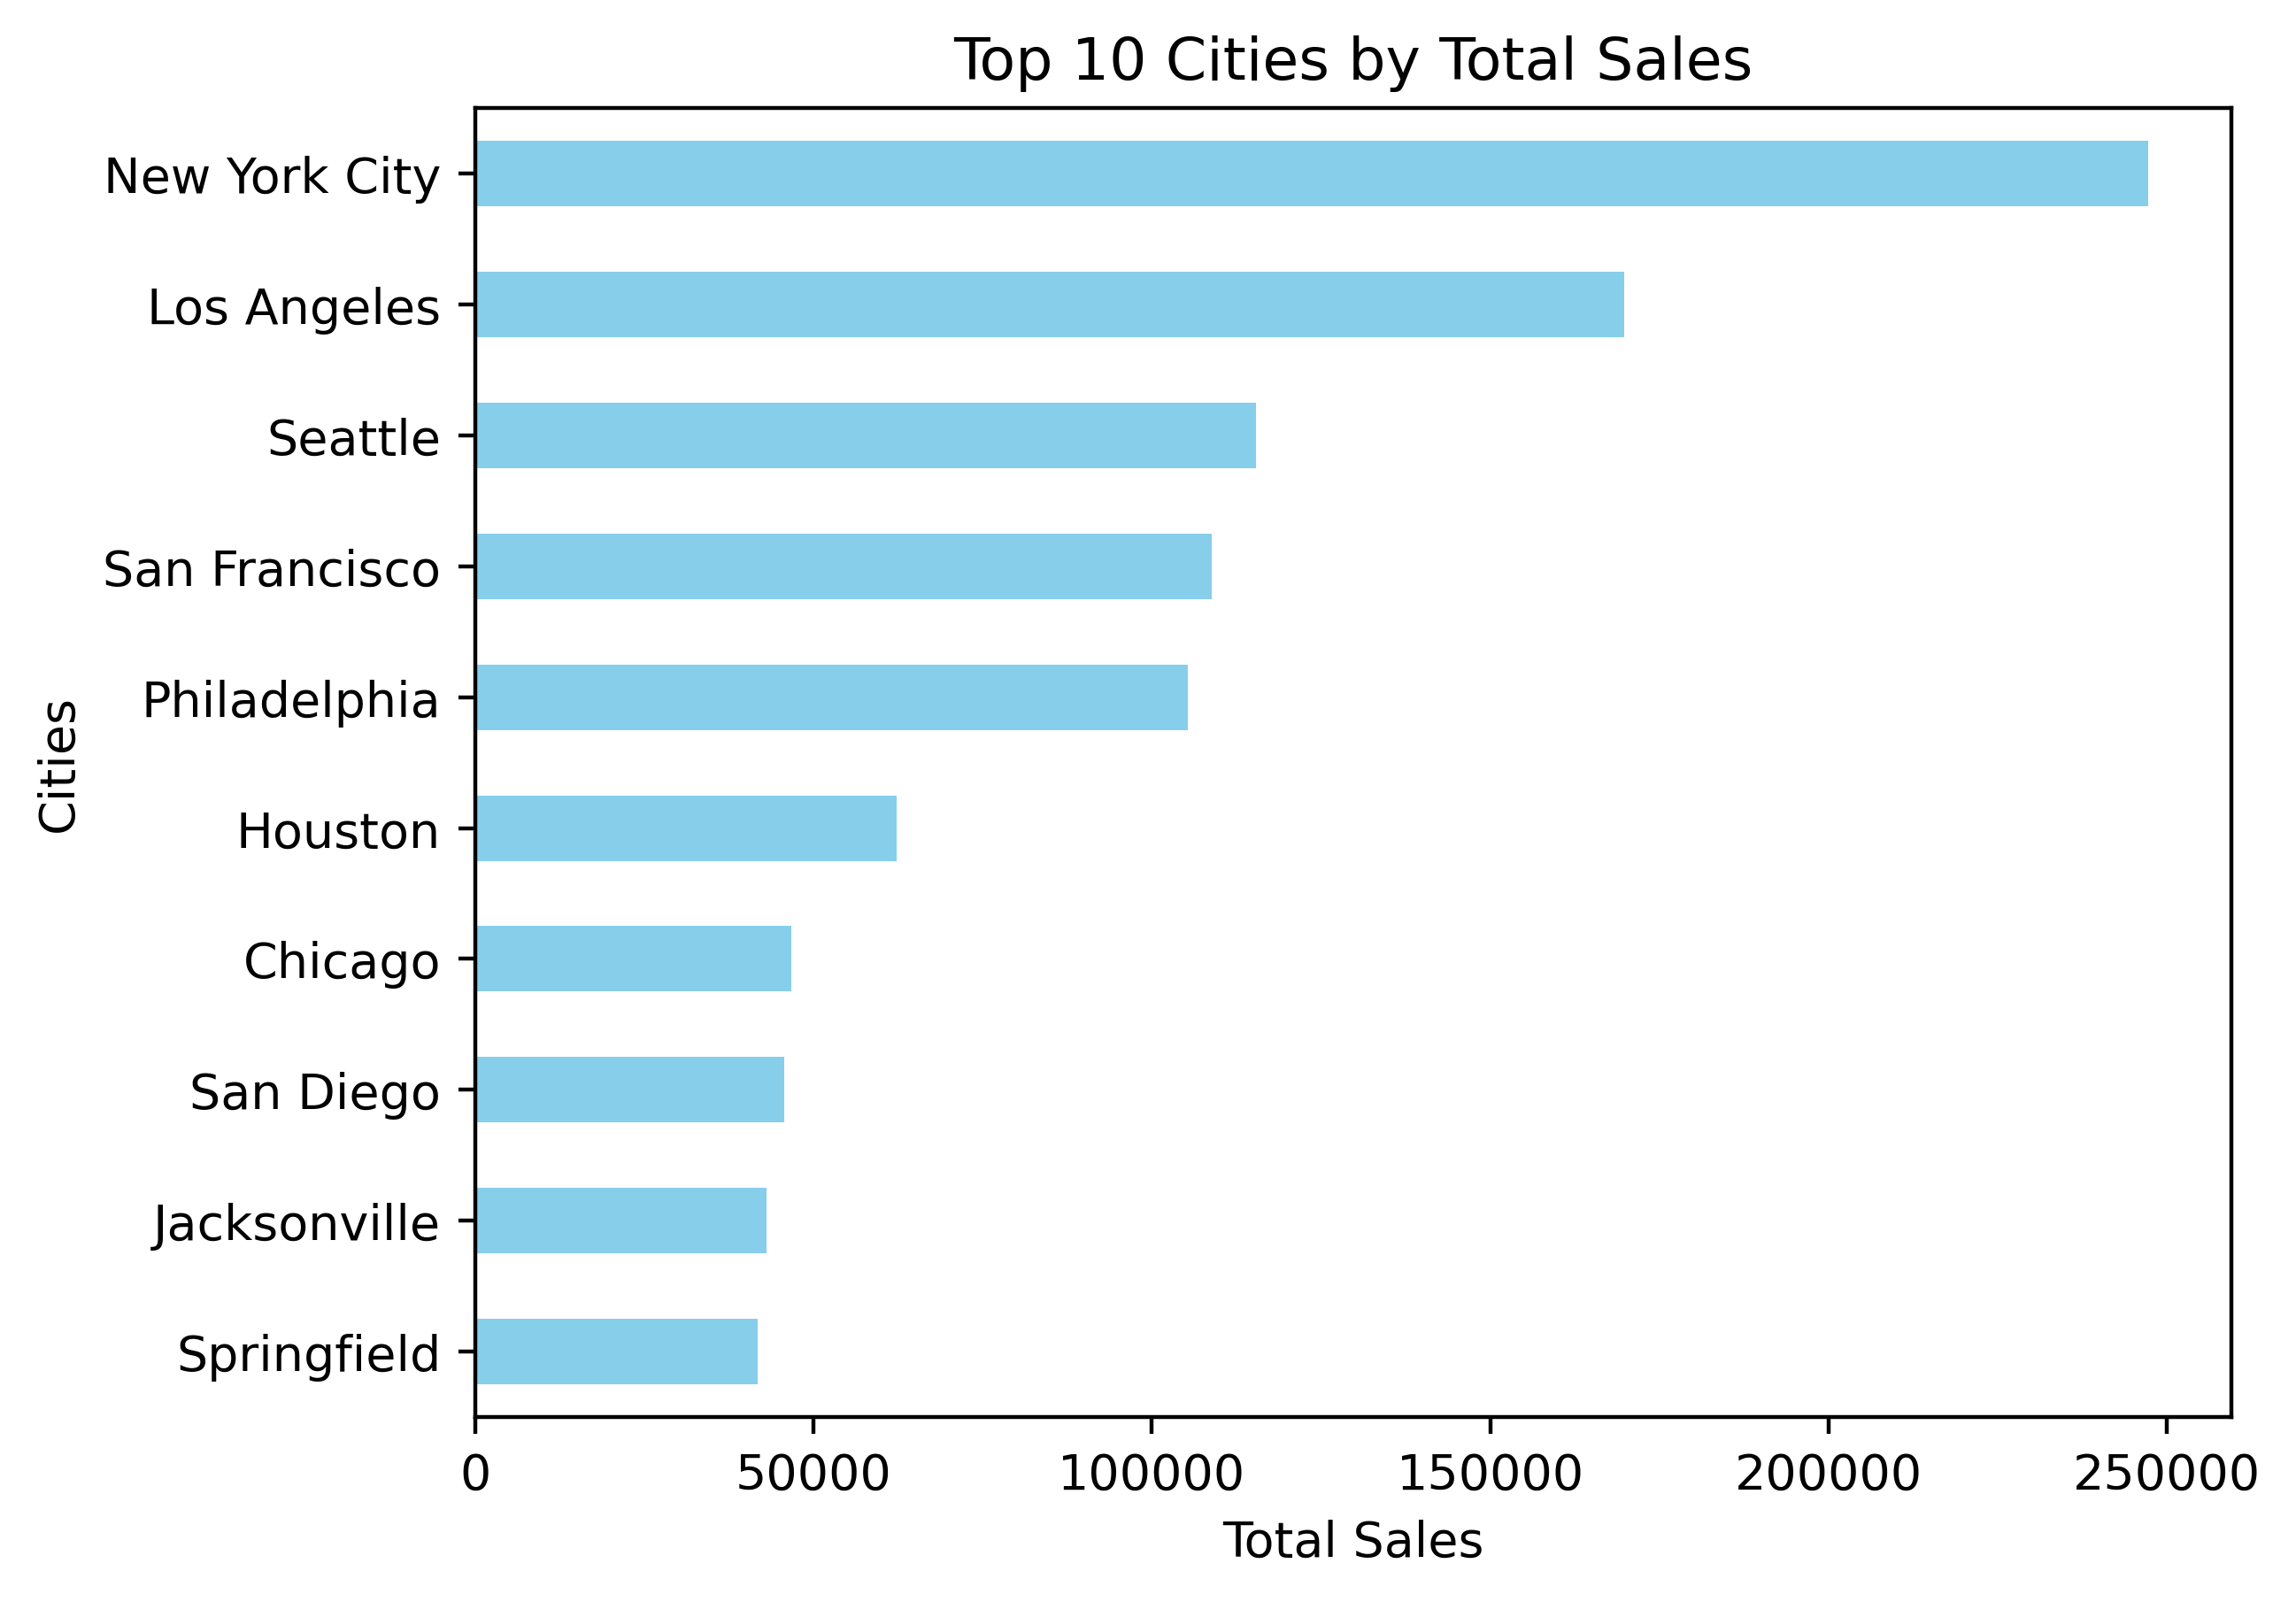

In [15]:
# Top 10 Cities by Total Sales
# plt.figure(figsize=(12, 6))
city_sales.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Cities')
plt.gca().invert_yaxis()
plt.savefig(r"D:\Data Science\Project\web\static\img\img-5")
plt.show()

In [16]:
# Profit Contribution by Segment
segment_profit = df.groupby('segment')['profit'].sum()

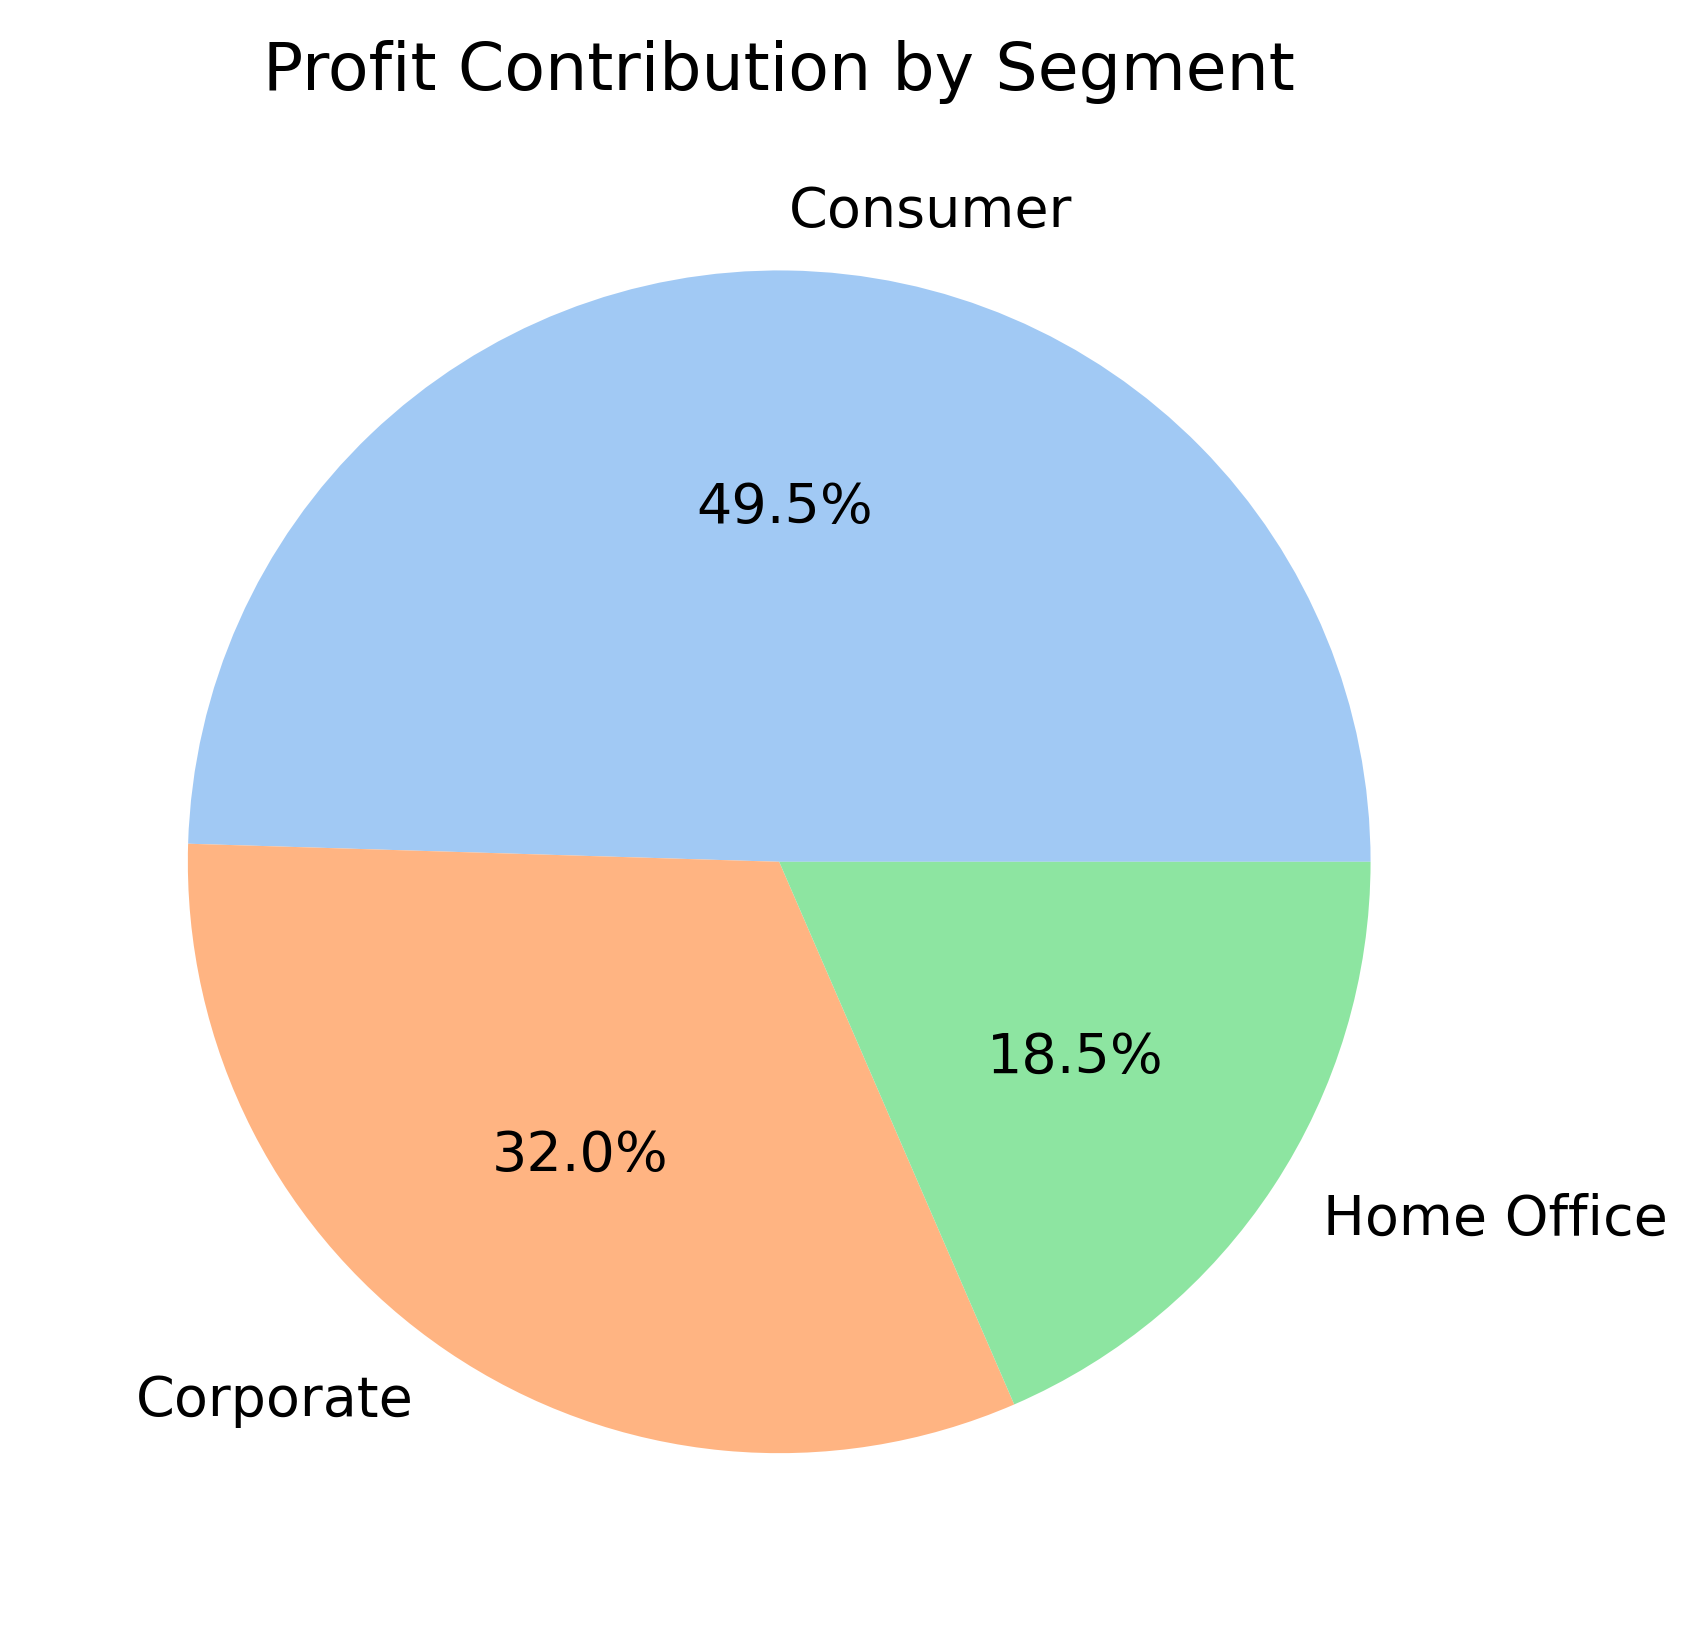

In [17]:
# plt.figure(figsize=(8, 8))
plt.pie(segment_profit, labels=segment_profit.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Profit Contribution by Segment')
plt.savefig(r"D:\Data Science\Project\web\static\img\img-6")
plt.show()

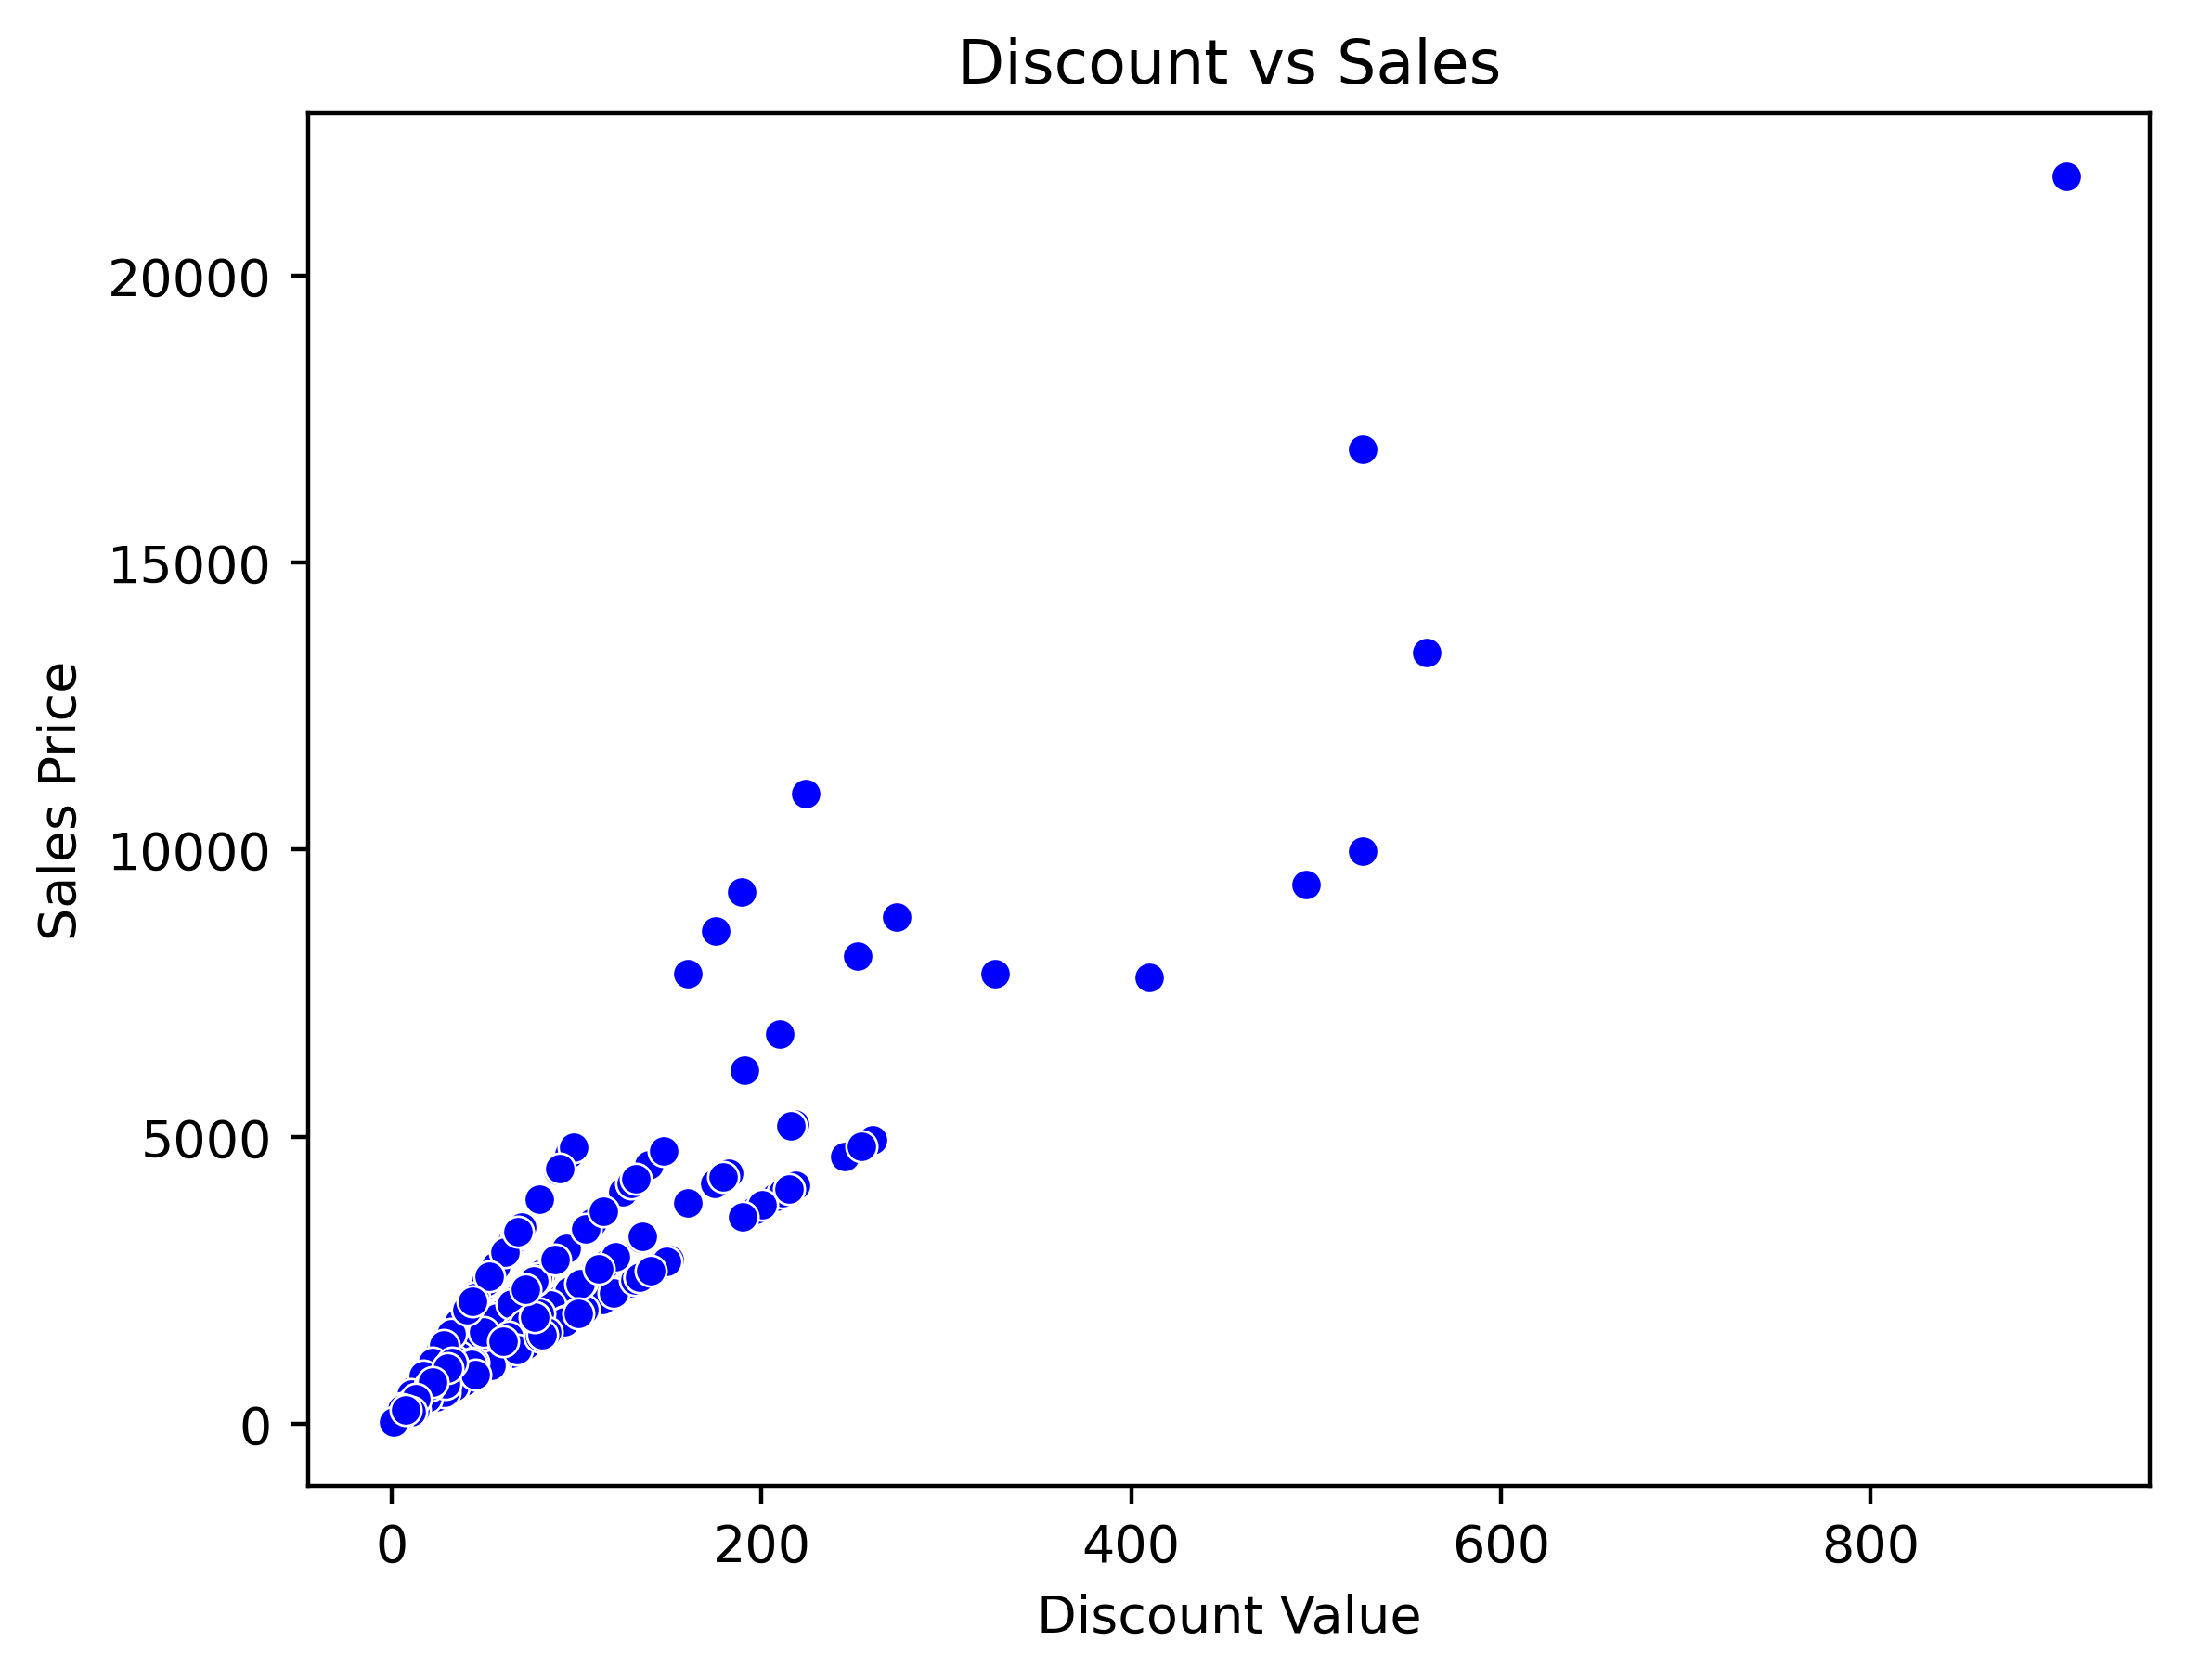

In [18]:
# Scatter plot for discount vs. sale price and profit
sns.scatterplot(data=df, x='discount_value', y='sale_price', color='blue')
plt.title('Discount vs Sales')
plt.xlabel('Discount Value')
plt.ylabel('Sales Price')
plt.savefig(r"D:\Data Science\Project\web\static\img\img-7")
plt.show()

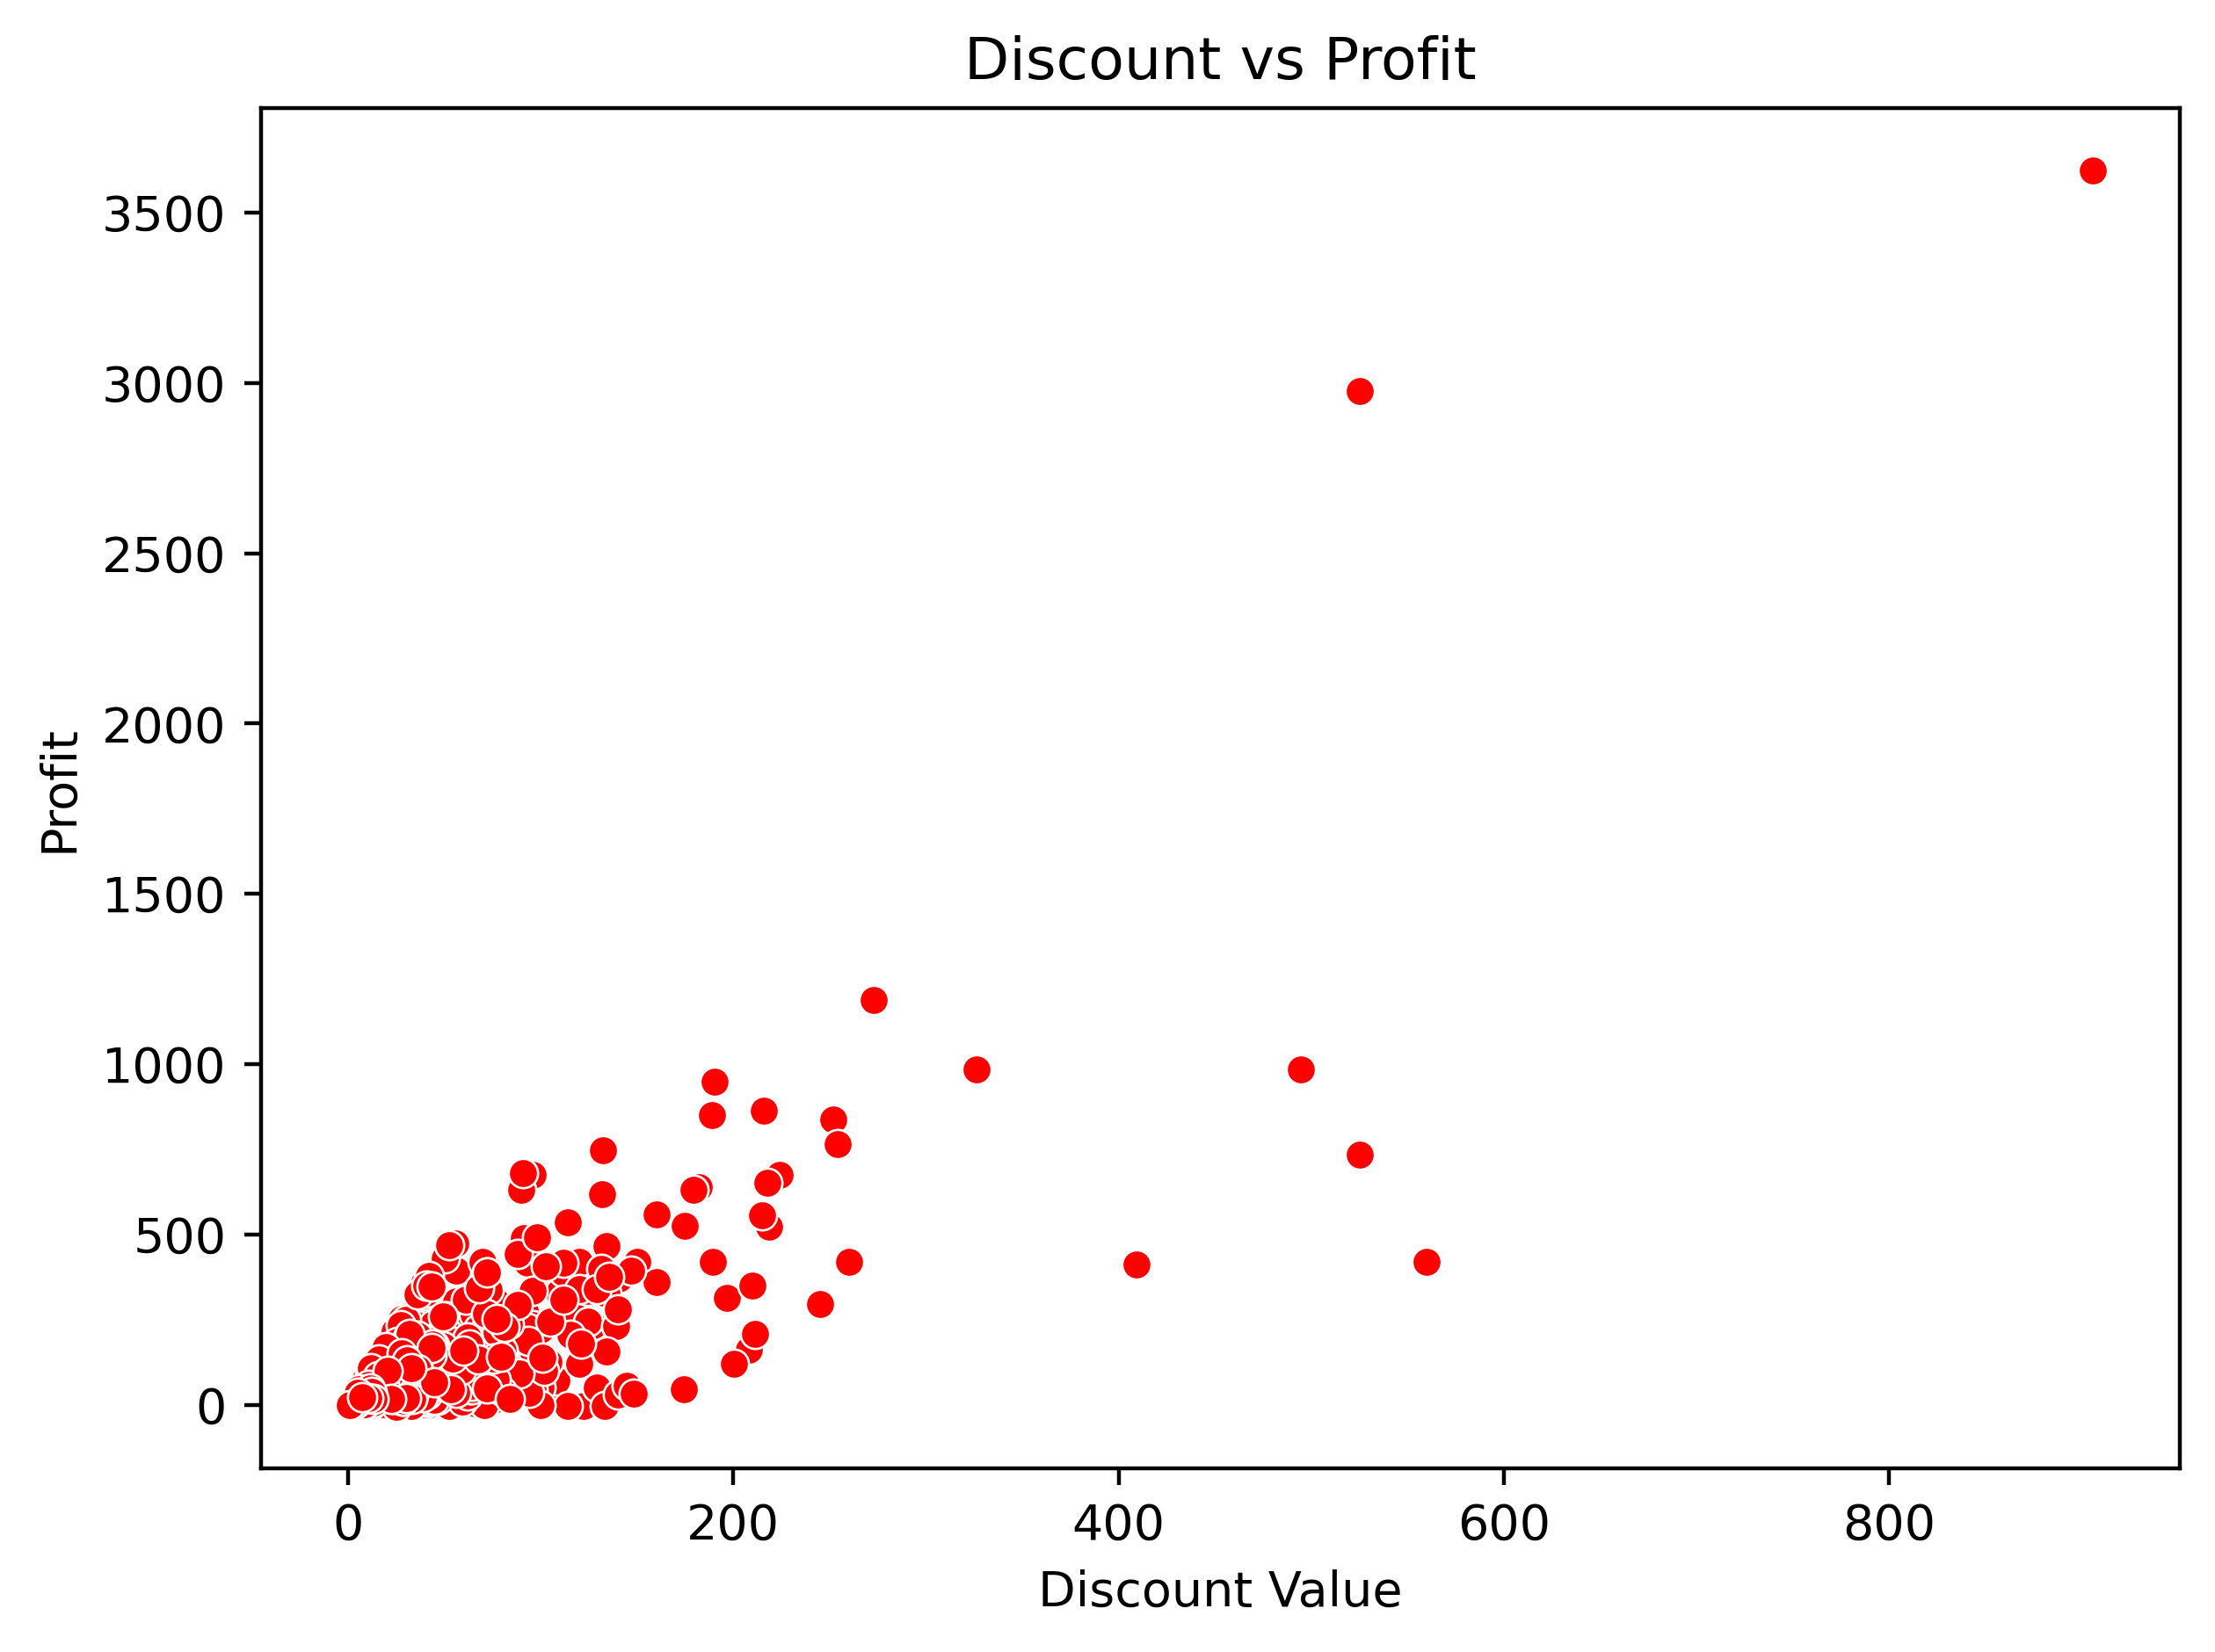

In [19]:
# Profit vs Discount
sns.scatterplot(data=df, x='discount_value', y='profit', color='red')
plt.title('Discount vs Profit')
plt.xlabel('Discount Value')
plt.ylabel('Profit')
plt.tight_layout()
plt.savefig(r"D:\Data Science\Project\web\static\img\img-8")
plt.show()

In [20]:
# Sales and Profit by State
state_data = df.groupby('state')[['sale_price', 'profit']].sum().sort_values(by='sale_price')

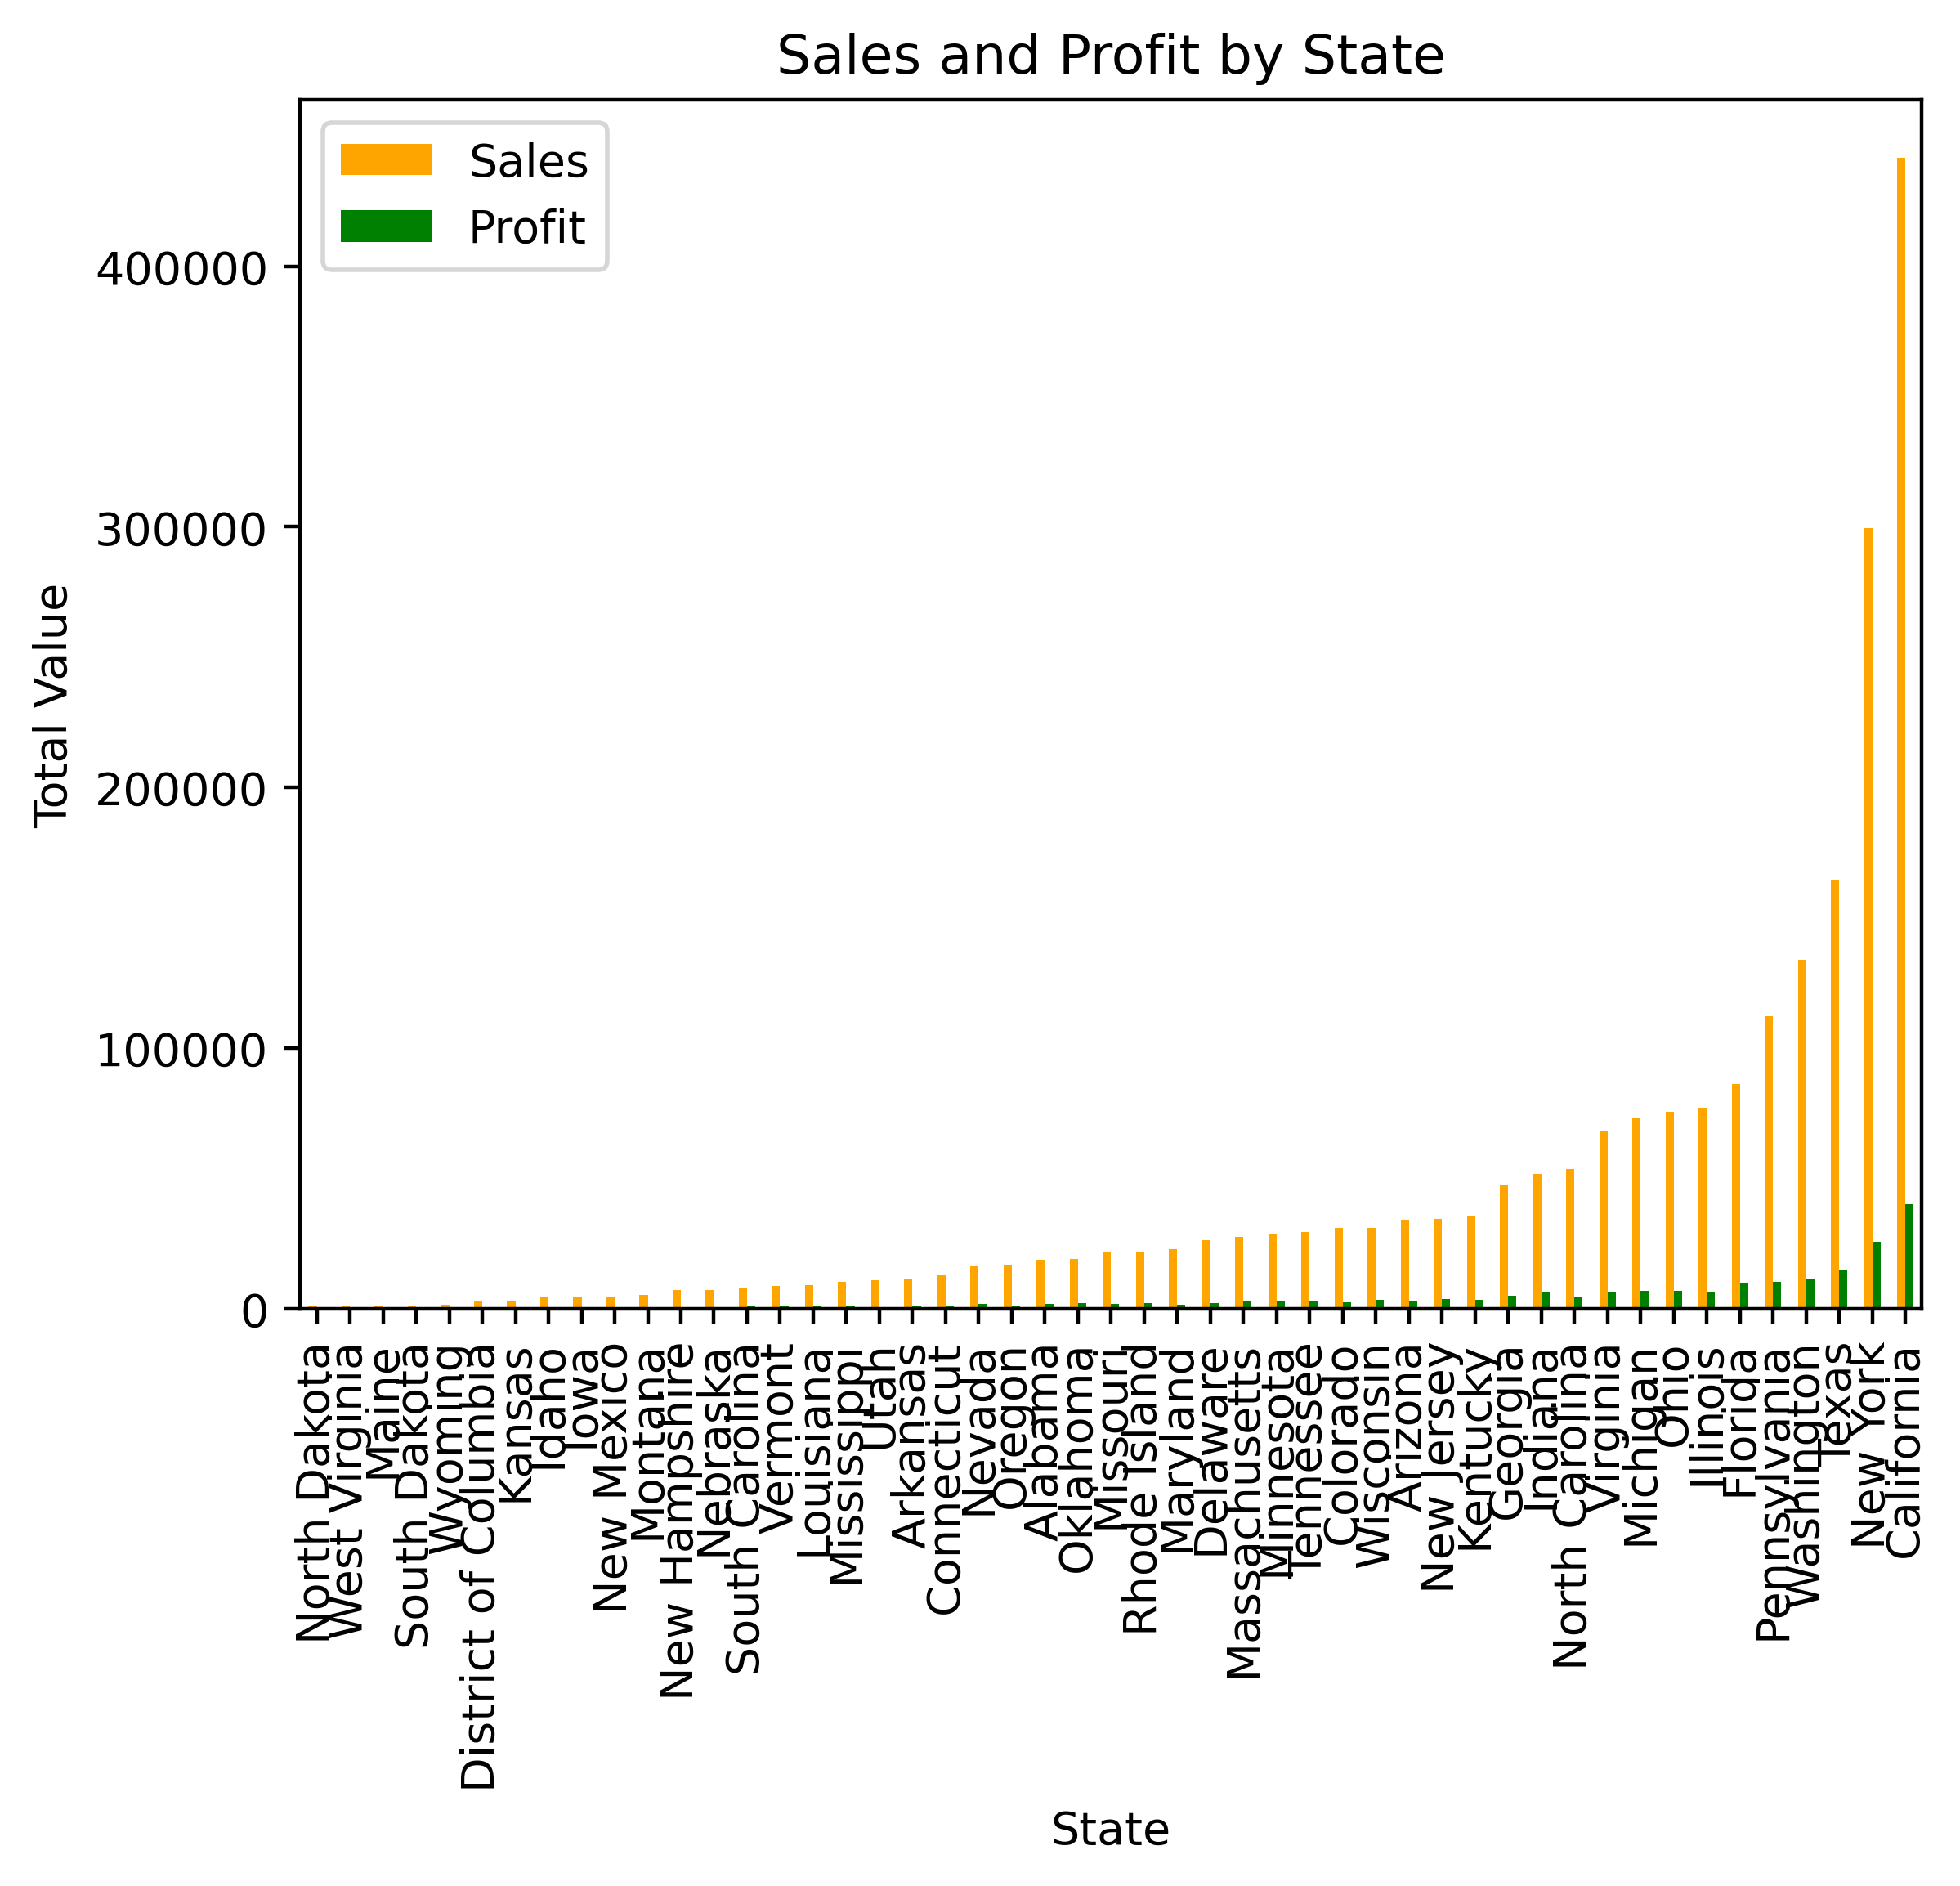

In [21]:
# plt.figure(dpi=400)
state_data.plot(kind='bar', stacked=False, color=['orange', 'green'], ax=plt.gca())
plt.title('Sales and Profit by State')
plt.xlabel('State')
plt.ylabel('Total Value')
plt.legend(['Sales', 'Profit'])
plt.xticks(rotation=90)
plt.savefig(r"D:\Data Science\Project\web\static\img\img-9")
plt.show()